In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


Data Pre-processing


In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi   
0  Female  80.0             0              1           never  25.19  \
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [4]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())



Checking for missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [5]:
data = pd.get_dummies(data, columns=['gender', 'smoking_history'])

In [6]:
print(data.columns)



Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')


In [9]:
# Convert True/False values to 1/0 for the existing one-hot encoded columns
data['gender_Male'] = data['gender_Male'].astype(int)
data['gender_Other'] = data['gender_Other'].astype(int)

data['smoking_history_current'] = data['smoking_history_current'].astype(int)
data['smoking_history_ever'] = data['smoking_history_ever'].astype(int)
data['smoking_history_former'] = data['smoking_history_former'].astype(int)
data['smoking_history_never'] = data['smoking_history_never'].astype(int)
data['smoking_history_not current'] = data['smoking_history_not current'].astype(int)




In [8]:
# Display the preprocessed data
print("\nPreprocessed data:")
print(data.head())


Preprocessed data:
    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level   
0  80.0             0              1  25.19          6.6                  140  \
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other   
0         0           True            0             0  \
1         0           True            0             0   
2         0          False            1             0   
3         0           True            0             0   
4         0          False            1             0   

   smoking_history_No Info  smoking_history_current  smoking_history_ever   
0                    False                        0                     0

Analytics of the data


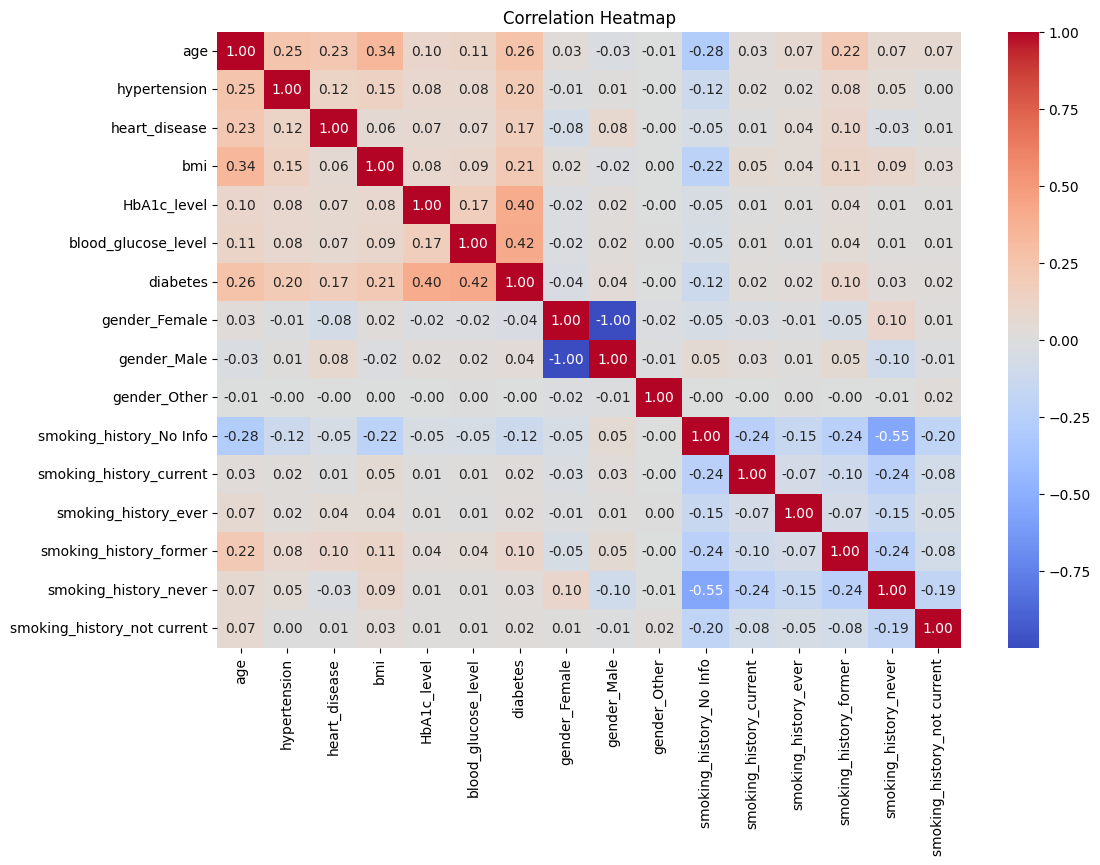

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

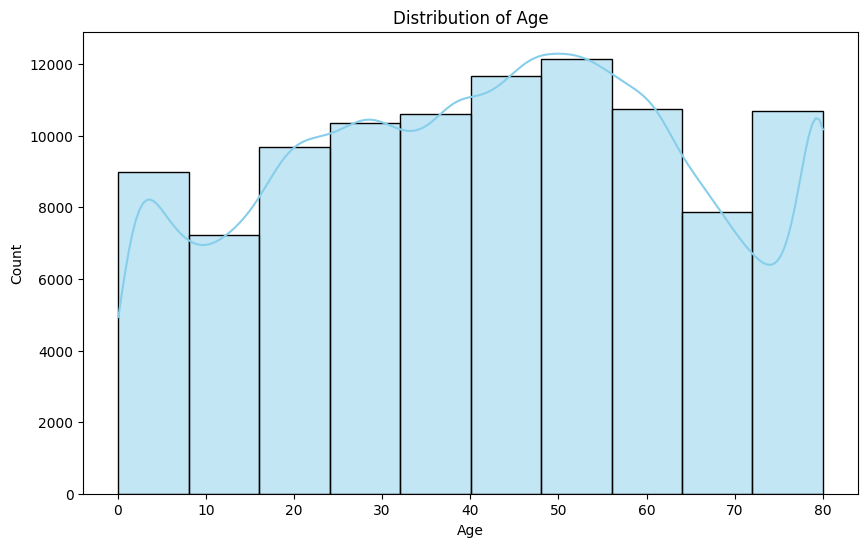

In [15]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

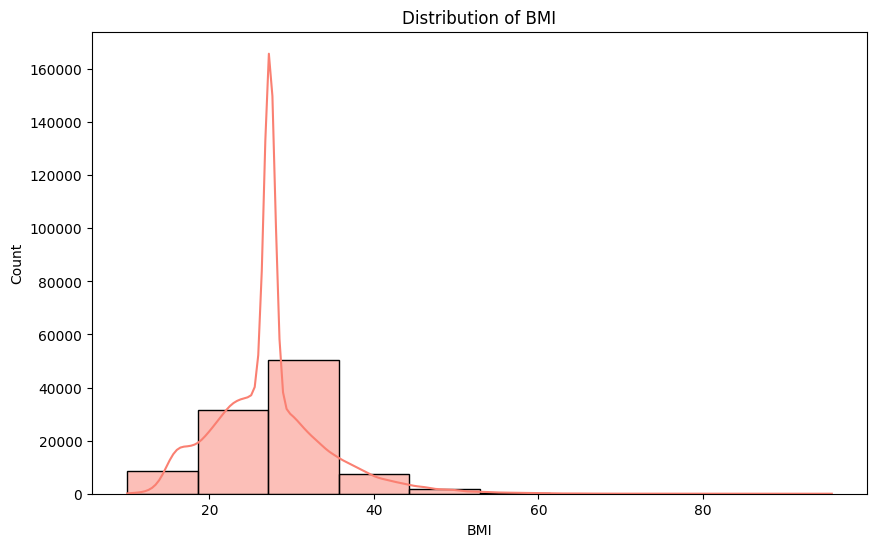

In [16]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], kde=True, bins=10, color='salmon')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

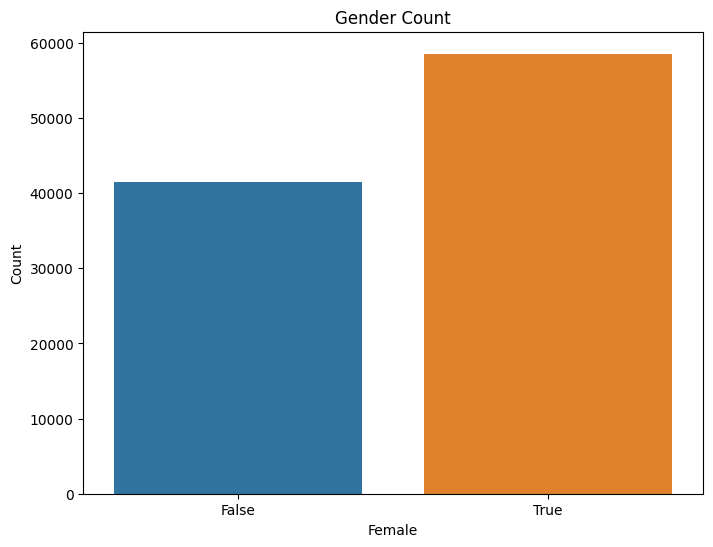

In [17]:
# Countplot of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender_Female', data=data)
plt.title('Gender Count')
plt.xlabel('Female')
plt.ylabel('Count')
plt.show()

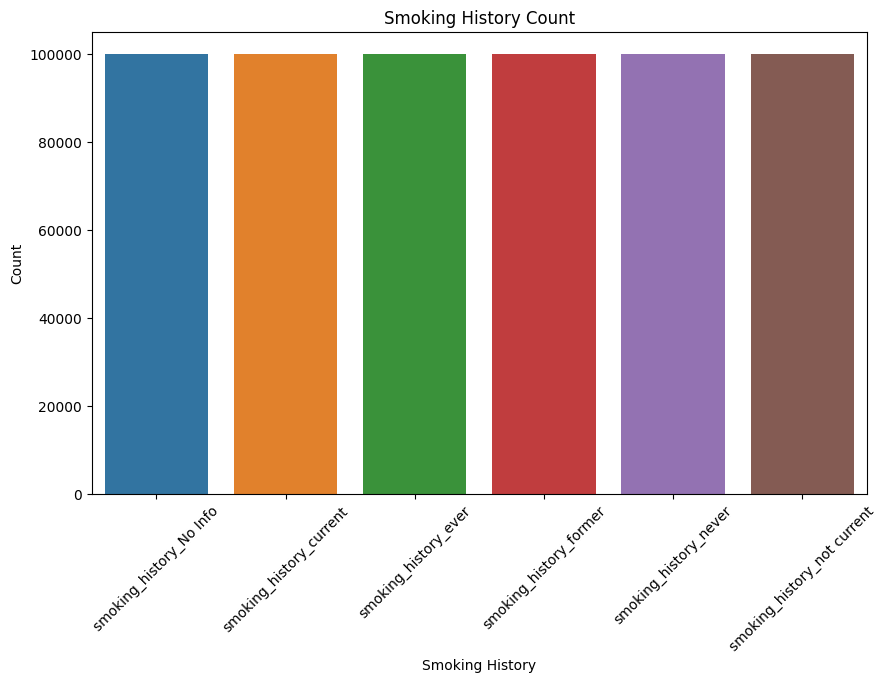

In [18]:
# Countplot of smoking history
plt.figure(figsize=(10, 6))
sns.countplot(data=data.iloc[:, 10:])
plt.title('Smoking History Count')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

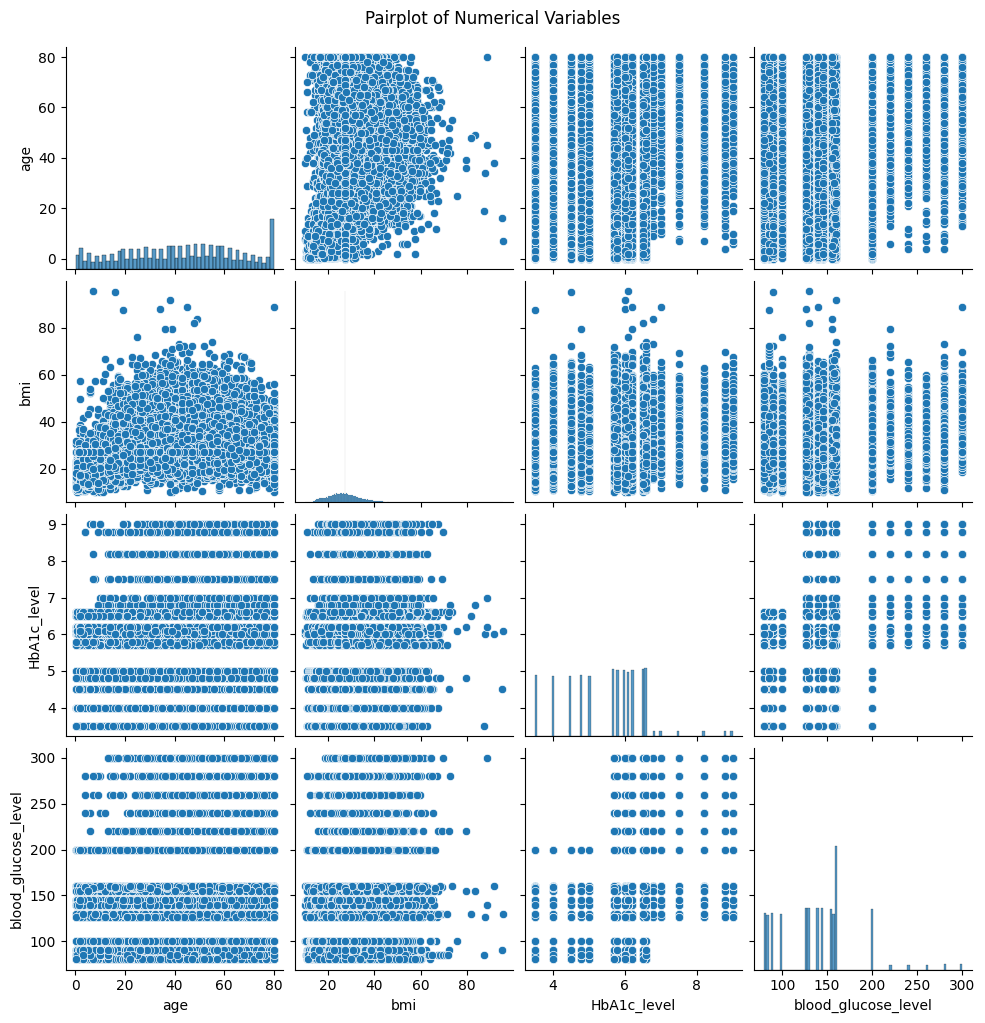

In [19]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

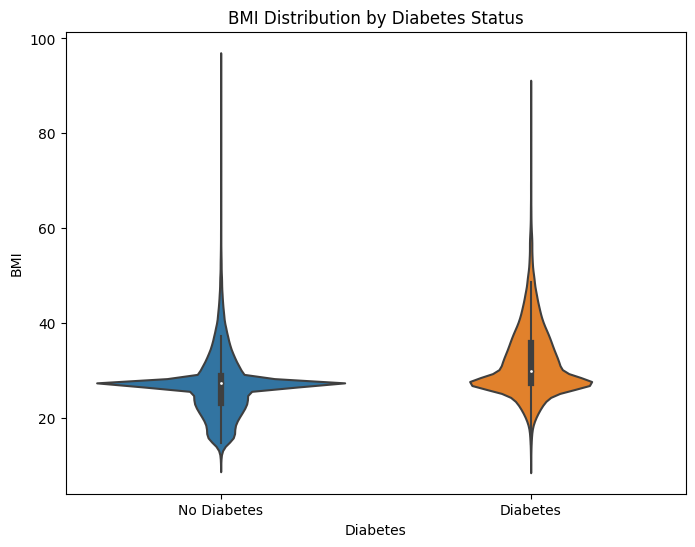

In [20]:
# Violin plot of BMI by diabetes status
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='bmi', data=data)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

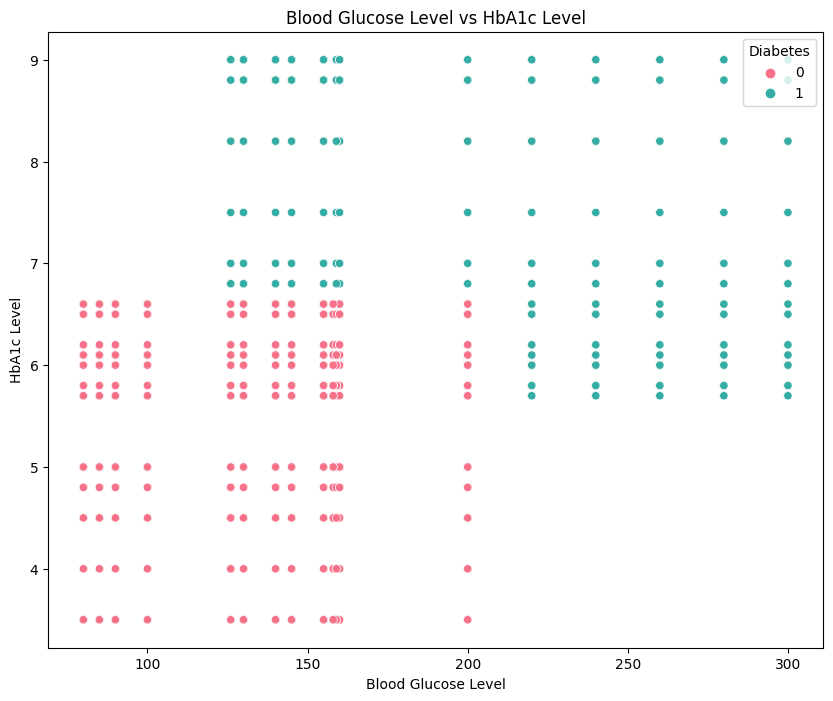

In [21]:
# Scatterplot of blood glucose level vs HbA1c level colored by diabetes status
plt.figure(figsize=(10, 8))
sns.scatterplot(x='blood_glucose_level', y='HbA1c_level', hue='diabetes', data=data, palette='husl')
plt.title('Blood Glucose Level vs HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.legend(title='Diabetes', loc='upper right')
plt.show()


In [22]:
# Mean values of numerical variables
mean_values = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].mean()
print("Mean values of numerical variables:")
print(mean_values)

Mean values of numerical variables:
age                     41.885856
bmi                     27.320767
HbA1c_level              5.527507
blood_glucose_level    138.058060
dtype: float64


In [23]:
# Grouping data by diabetes status and computing mean values
diabetes_mean = data.groupby('diabetes').mean()
print("\nMean values by diabetes status:")
print(diabetes_mean)



Mean values by diabetes status:
                age  hypertension  heart_disease        bmi  HbA1c_level   
diabetes                                                                   
0         40.115187      0.058984       0.029235  26.887163     5.396761  \
1         60.946588      0.245647       0.149059  31.988382     6.934953   

          blood_glucose_level  gender_Female  gender_Male  gender_Other   
diabetes                                                                  
0                  132.852470       0.591158     0.408645      0.000197  \
1                  194.094706       0.524824     0.475176      0.000000   

          smoking_history_No Info  smoking_history_current   
diabetes                                                     
0                        0.375541                 0.091126  \
1                        0.171059                 0.111529   

          smoking_history_ever  smoking_history_former  smoking_history_never   
diabetes                       

Training the Model

In [10]:
""" Splitting the data into features and target variable
     Training set = 80%
     Testing set = 20%   """
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [12]:
# Predicting on the testing data
y_pred = svm_model.predict(X_test_scaled)


In [20]:
# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.92      0.57      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.94      0.78      0.84     20000
weighted avg       0.96      0.96      0.95     20000



In [23]:
# Printing Confusion Matrix with more details and comments
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)




Confusion Matrix:
[[18209    83]
 [  730   978]]


In [24]:
# Extracting TP, TN, FP, FN from confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate metrics
accuracy = (TP + TN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#more metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 0.96
Precision: 0.92
Recall: 0.57
F1 Score: 0.71


Saving the model Locally

In [38]:
filename = 'model_diabetes.sav'
pickle.dump(svm_model, open(filename, 'wb'))

Testing the model

In [34]:
# Example data for prediction
example_data = pd.DataFrame({
    'age': [50, 35, 65],
    'hypertension': [0, 1, 1],
    'heart_disease': [0, 0, 1],
    'bmi': [26.5, 31.2, 28.0],
    'HbA1c_level': [6.2, 5.8, 6.5],
    'blood_glucose_level': [120, 160, 180],
    'gender_Female': [1, 0, 0],  # Assuming all are female
    'gender_Male': [0, 1, 0],  # Assuming all are male
    'gender_Other': [0, 0, 0],  # Assuming none are 'Other'
    'smoking_history_No Info': [0, 0, 0],  # Assuming no missing smoking history
    'smoking_history_current': [0, 1, 0],  # Assuming one person is current smoker
    'smoking_history_ever': [1, 0, 1],  # Assuming two people have smoked before
    'smoking_history_former': [0, 0, 0],  # Assuming none are former smokers
    'smoking_history_never': [0, 0, 0]  # Assuming none are non-smokers
})

# Standardize the example data using the same scaler used for training data
example_data_scaled = scaler.transform(example_data)

# Predicting whether each person has diabetes or not
predictions = svm_model.predict(example_data_scaled)

# Printing the predictions
print("Predictions for diabetes (1: Yes, 0: No):")
for i, prediction in enumerate(predictions):
    print(f"Person {i+1}: {prediction}")


Predictions for diabetes (1: Yes, 0: No):
Person 1: 0
Person 2: 0
Person 3: 1
